In [1]:
import pandas as pd
import numpy as np
import itertools as it

import pickle as pcl

from scipy.spatial.distance import cdist

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

from collections import Counter

import brewer2mpl

# Get "Set2" colors from ColorBrewer (all colorbrewer scales: http://bl.ocks.org/mbostock/5577023)
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift

import hightolowz

In [3]:
#%run load_wmap1.py

#z6_density_select_groupinfo = pd.read_csv('data/wmap1/z6_density_select_groupinfo.csv')

In [2]:
#z6_galaxies_mstar = pd.read_csv('data/wmap1/guo2010a_z6_mstar9.csv', skiprows=52, skipfooter=1, engine='python')

In [127]:
gals = pd.read_csv('data/planck1/henriques2015a_z6p42_mstar.csv', 
                   skiprows=101, skipfooter=1, engine='python')

In [128]:
from sklearn.cluster import DBSCAN

In [174]:
dbsc = DBSCAN(eps = 4, min_samples = 6)

In [175]:
dbsc.fit(gals[['zn_x','zn_y','zn_z']])

DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
    min_samples=6, p=None, random_state=None)

In [176]:
c = Counter(dbsc.labels_)
c.most_common()

[(-1, 27891),
 (26, 17),
 (29, 17),
 (1, 16),
 (97, 16),
 (10, 15),
 (142, 14),
 (27, 13),
 (17, 12),
 (34, 12),
 (38, 12),
 (43, 12),
 (63, 12),
 (144, 12),
 (21, 11),
 (31, 11),
 (32, 11),
 (36, 11),
 (53, 11),
 (58, 11),
 (9, 10),
 (28, 10),
 (33, 10),
 (35, 10),
 (50, 10),
 (106, 10),
 (122, 10),
 (6, 9),
 (14, 9),
 (22, 9),
 (24, 9),
 (47, 9),
 (72, 9),
 (74, 9),
 (80, 9),
 (88, 9),
 (100, 9),
 (102, 9),
 (107, 9),
 (112, 9),
 (123, 9),
 (2, 8),
 (5, 8),
 (7, 8),
 (13, 8),
 (16, 8),
 (25, 8),
 (40, 8),
 (42, 8),
 (55, 8),
 (56, 8),
 (57, 8),
 (60, 8),
 (62, 8),
 (65, 8),
 (70, 8),
 (71, 8),
 (95, 8),
 (104, 8),
 (113, 8),
 (114, 8),
 (119, 8),
 (136, 8),
 (140, 8),
 (154, 8),
 (4, 7),
 (12, 7),
 (15, 7),
 (18, 7),
 (30, 7),
 (39, 7),
 (41, 7),
 (44, 7),
 (45, 7),
 (51, 7),
 (52, 7),
 (69, 7),
 (78, 7),
 (82, 7),
 (83, 7),
 (85, 7),
 (87, 7),
 (89, 7),
 (90, 7),
 (91, 7),
 (93, 7),
 (96, 7),
 (101, 7),
 (103, 7),
 (105, 7),
 (109, 7),
 (110, 7),
 (120, 7),
 (127, 7),
 (128, 7),
 (1

In [177]:
len(Counter(dbsc.labels_))

167

In [178]:
dbsc_cluster = 0

In [179]:
print Counter(gals['z0_central_mcrit200'][dbsc.labels_ == dbsc_cluster]).most_common()

[(64219.741999999998, 6)]


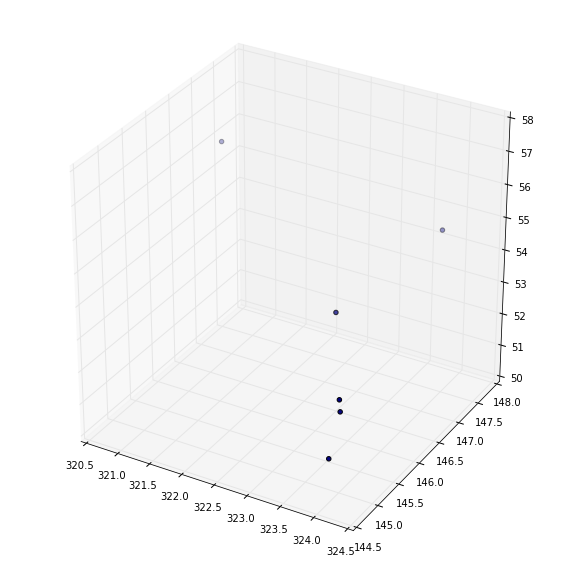

In [180]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(gals[dbsc.labels_ == dbsc_cluster]['zn_x'],
           gals[dbsc.labels_ == dbsc_cluster]['zn_y'],
           zs=gals[dbsc.labels_ == dbsc_cluster]['zn_z'], 
           c=gals['z0_centralId'][dbsc.labels_ == dbsc_cluster])


#### Assess match

In [181]:
i = 1

candidate = c.most_common()[i][0]
dbsc_gals = gals.loc[dbsc.labels_ == candidate]

print "Candidate label:", candidate

Candidate label: 26


Number of galaxies in the candidate

In [182]:
dbsc_gals.shape

(17, 21)

Mass of most common descendant halo

In [183]:
np.log10(np.unique(gals[gals['z0_centralId'] == Counter(dbsc_gals['z0_centralId']).most_common()[0][0]]['z0_central_mcrit200']) * 1e10)

array([ 14.72033472])

Total number of progenitor galaxies for the most common descendant halo

In [184]:
gals[gals['z0_centralId'] == Counter(dbsc_gals['z0_centralId']).most_common()[0][0]].shape

(21, 21)

For the most common descendant halo, the number of candidates it is split between. -1 means no candidate.

In [185]:
Counter(dbsc.labels_[np.array(gals['z0_centralId'] == Counter(dbsc_gals['z0_centralId']).most_common()[0][0])])

Counter({-1: 4, 26: 17})

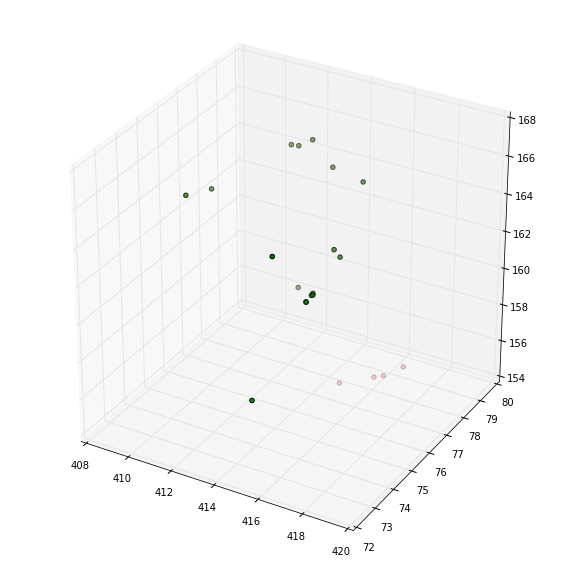

In [186]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

temp = gals[gals['z0_centralId'] == Counter(dbsc_gals['z0_centralId']).most_common()[0][0]]

ax.scatter(temp['zn_x'],
           temp['zn_y'],
           zs=temp['zn_z'], 
           c='red', alpha=0.2)

ax.scatter(gals[dbsc.labels_ == candidate]['zn_x'],
           gals[dbsc.labels_ == candidate]['zn_y'],
           zs=gals[dbsc.labels_ == candidate]['zn_z'], 
           c = 'green')
           #c=z6_galaxies_mstar['z0_centralId'][dbsc.labels_ == candidate])


In [178]:
from sklearn.metrics import adjusted_rand_score

In [184]:
true_labels = z6_galaxies_mstar['z0_centralId'].copy()

true_labels[z6_galaxies_mstar['z0_centralMvir'] < 1e4] = -1

In [188]:
adjusted_rand_score(true_labels, dbsc.labels_)

0.42865040967686113

## Galaxy Overdensity analysis

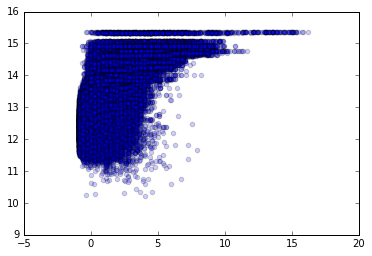

In [6]:
plt.scatter(z6_galaxies_mstar['delta_gal_10'], 
            np.log10(z6_galaxies_mstar['z0_centralMvir'] * 1e10), alpha = 0.2)

## Protocluster selection

In [7]:
protoclusters_20, pc_members_20 = pcl.load(open('data/wmap1/protoclusters_r20.p','rb'))
protoclusters_15, pc_members_15 = pcl.load(open('data/wmap1/protoclusters_r15.p','rb'))
protoclusters_10, pc_members_10 = pcl.load(open('data/wmap1/protoclusters_r10.p','rb'))

## PDF comparison

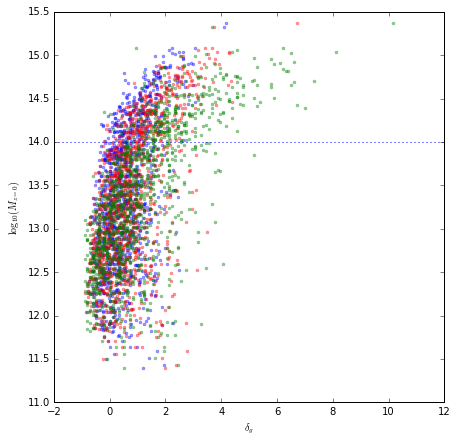

In [64]:
fig, ax = plt.subplots(figsize=(7,7))

# ax.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'],
#         np.log10(z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] * 1e10),
#         '.', alpha=0.4)

# ax.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'],
#         np.log10(z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] * 1e10),
#         '.', alpha=0.4)

ax.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='blue')

ax.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_15'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='red')

ax.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_10'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='green')

ax.axhline(14, ls=':')

ax.set_xlabel('$\delta_{g}$')
ax.set_ylabel('$\mathrm{log_{10}}(M_{z=0})$')

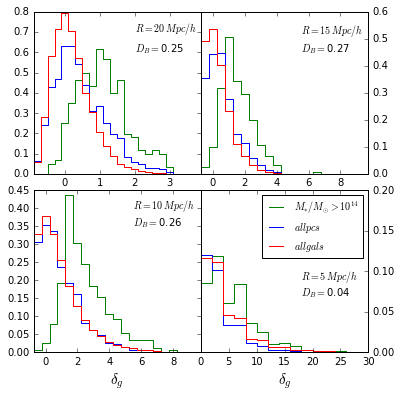

In [65]:
fig = plt.figure(figsize=(6,11))

gs = gridspec.GridSpec(2, 2)

gs.update(bottom = 0.57, top = 1, wspace=0, hspace=0.1)

ax = []
ax.append(fig.add_subplot(gs[0,0]))
ax.append(fig.add_subplot(gs[1,0]))
ax.append(fig.add_subplot(gs[0,1]))
ax.append(fig.add_subplot(gs[1,1]))


# r = 20
binLimits = np.linspace(-1, 4, 26)
bins = np.linspace(-0.9, 3.9, 25)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'][z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] > 1e4],
                          bins=binLimits, normed=True)
ax[0].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'],
                          bins=binLimits, normed=True)
ax[0].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_20'], bins=binLimits, normed=True)
ax[0].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[0].text(2., 0.6, "$D_{B} = $" + str(round(DB, 2)))

ax[0].set_xlim(bins[0],bins[-1])
ax[0].text(2., 0.7, '$R = 20 \, Mpc / h$')
ax[0].set_xlabel('$\delta_{g}$', size = 15)

# r = 15
binLimits = np.linspace(-1, 10, 23)
bins = np.linspace(-0.75, 9.75, 22)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_15'][z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[2].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[2].text(5.5, 0.45, "$D_{B} = $" + str(round(DB, 2)))

ax[2].set_xlim(bins[0],bins[-1])
ax[2].text(5.5, 0.52, '$R = 15  \, Mpc / h$')

ax[2].yaxis.tick_right()
ax[2].set_xlabel('$\delta_{g}$', size = 15)

# r = 10
phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_10'][z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[1].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[1].text(5.5, 0.35, "$D_{B} = $" + str(round(DB, 2)))

ax[1].set_xlim(bins[0],bins[-1])

ax[1].text(5.5, 0.4, '$R = 10 \, Mpc / h$')
ax[1].set_xlabel('$\delta_{g}$', size = 15)

# r = 5
binLimits = np.linspace(-1, 31, 17)
bins = np.linspace(0, 30, 16)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_5'][z6_galaxies_mstar.ix[protoclusters_20]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[3].step(bins, phiA, label='$M_{*}/M_{\odot} > 10^{14}$', color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phi, label='$all pcs$', color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phiB, label='$all gals$', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[3].text(18, 0.07, "$D_{B} = $" + str(round(DB, 2)))

ax[3].set_xlim(bins[0],bins[-1])
ax[3].yaxis.tick_right()
ax[3].text(18, 0.09, '$R = 5 \, Mpc / h$')
ax[3].set_xlabel('$\delta_{g}$', size = 15)
ax[3].legend(prop={'size': 10})

#plt.savefig('../papers/hightolowz/images/gal_od_r20.png', bbox_inches='tight', dpi=300)

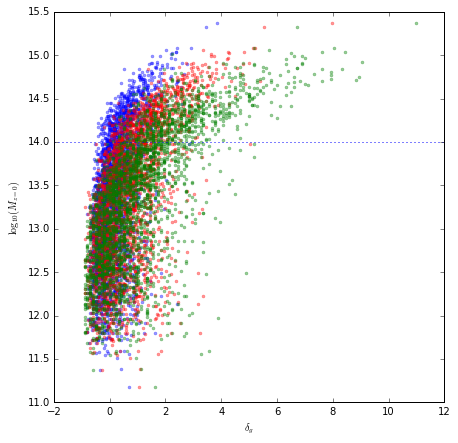

In [66]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_20'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='blue')

ax.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='red')

ax.plot(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_10'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='green')

ax.axhline(14, ls=':')

ax.set_xlabel('$\delta_{g}$')
ax.set_ylabel('$\mathrm{log_{10}}(M_{z=0})$')

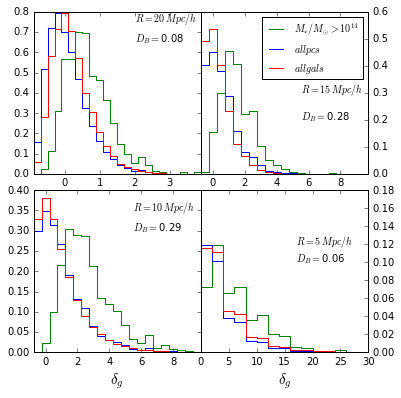

In [67]:
fig = plt.figure(figsize=(6,11))

gs = gridspec.GridSpec(2, 2)

gs.update(bottom = 0.57, top = 1, wspace=0, hspace=0.1)

ax = []
ax.append(fig.add_subplot(gs[0,0]))
ax.append(fig.add_subplot(gs[1,0]))
ax.append(fig.add_subplot(gs[0,1]))
ax.append(fig.add_subplot(gs[1,1]))


# r = 20
binLimits = np.linspace(-1, 4, 26)
bins = np.linspace(-0.9, 3.9, 25)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_20'][z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] > 1e4],
                          bins=binLimits, normed=True)
ax[0].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_20'],
                          bins=binLimits, normed=True)
ax[0].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_20'], bins=binLimits, normed=True)
ax[0].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[0].text(2, 0.65, "$D_{B} = $" + str(round(DB, 2)))

ax[0].set_xlim(bins[0],bins[-1])
ax[0].text(2, 0.75, '$R = 20 \, Mpc / h$')
ax[0].set_xlabel('$\delta_{g}$', size = 15)

# r = 15
binLimits = np.linspace(-1, 10, 23)
bins = np.linspace(-0.75, 9.75, 22)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'][z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[2].step(bins, phiA, label='$M_{*}/M_{\odot} > 10^{14}$', color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phi, label='$all pcs$', color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phiB, label='$all gals$', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[2].text(5.5, 0.2, "$D_{B} = $" + str(round(DB, 2)))

ax[2].set_xlim(bins[0],bins[-1])
ax[2].text(5.5, 0.3, '$R = 15  \, Mpc / h$')

ax[2].yaxis.tick_right()
ax[2].set_xlabel('$\delta_{g}$', size = 15)

# r = 10
phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_10'][z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[1].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[1].text(5.5, 0.3, "$D_{B} = $" + str(round(DB, 2)))

ax[1].set_xlim(bins[0],bins[-1])

ax[1].text(5.5, 0.35, '$R = 10 \, Mpc / h$')
ax[1].set_xlabel('$\delta_{g}$', size = 15)

# r = 5
binLimits = np.linspace(-1, 31, 17)
bins = np.linspace(0, 30, 16)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_5'][z6_galaxies_mstar.ix[protoclusters_15]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[3].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[3].text(17, 0.10, "$D_{B} = $" + str(round(DB, 2)))

ax[3].set_xlim(bins[0],bins[-1])
ax[3].yaxis.tick_right()
ax[3].text(17, 0.12, '$R = 5 \, Mpc / h$')
ax[3].set_xlabel('$\delta_{g}$', size = 15)

ax[2].legend(prop={'size': 10})

#plt.savefig('../papers/hightolowz/images/gal_od_r15.png', bbox_inches='tight', dpi=300)

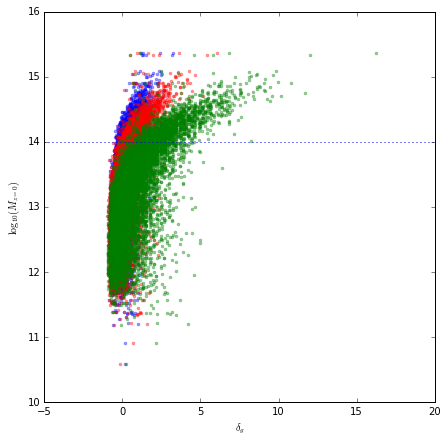

In [68]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_20'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='blue')

ax.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_15'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='red')

ax.plot(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'],
        np.log10(z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] * 1e10),
        '.', alpha=0.4, c='green')

ax.axhline(14, ls=':')

ax.set_xlabel('$\delta_{g}$')
ax.set_ylabel('$\mathrm{log_{10}}(M_{z=0})$')

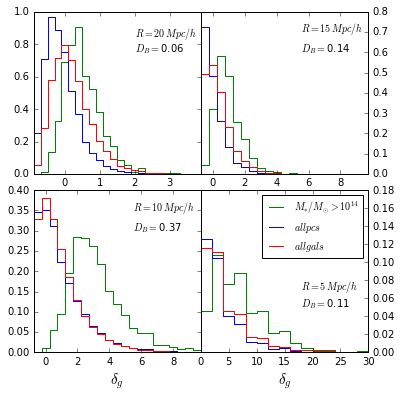

In [52]:
fig = plt.figure(figsize=(6,11))

gs = gridspec.GridSpec(2, 2)

gs.update(bottom = 0.57, top = 1, wspace=0., hspace=0.1)

ax = []
ax.append(fig.add_subplot(gs[0,0]))
ax.append(fig.add_subplot(gs[1,0]))
ax.append(fig.add_subplot(gs[0,1]))
ax.append(fig.add_subplot(gs[1,1]))


# r = 20
binLimits = np.linspace(-1, 4, 26)
bins = np.linspace(-0.9, 3.9, 25)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_20'][z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] > 1e4],
                          bins=binLimits, normed=True)
ax[0].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_20'],
                          bins=binLimits, normed=True)
ax[0].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_20'], bins=binLimits, normed=True)
ax[0].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[0].text(2, 0.75, "$D_{B} = $" + str(round(DB, 2)))

ax[0].set_xlim(bins[0],bins[-1])
ax[0].text(2, 0.85, '$R = 20 \, Mpc / h$')
ax[0].set_xlabel('$\delta_{g}$', size = 15)

# r = 15
binLimits = np.linspace(-1, 10, 23)
bins = np.linspace(-0.75, 9.75, 22)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_15'][z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[2].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_15'], bins=binLimits, normed=True)
ax[2].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[2].text(5.5, 0.6, "$D_{B} = $" + str(round(DB, 2)))

ax[2].set_xlim(bins[0],bins[-1])
ax[2].text(5.5, 0.7, '$R = 15  \, Mpc / h$')

ax[2].yaxis.tick_right()
ax[2].set_xlabel('$\delta_{g}$', size = 15)

# r = 10
phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'][z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[1].step(bins, phiA, color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phi, color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_10'], bins=binLimits, normed=True)
ax[1].step(bins, phiB, color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[1].text(5.5, 0.3, "$D_{B} = $" + str(round(DB, 2)))

ax[1].set_xlim(bins[0],bins[-1])

ax[1].text(5.5, 0.35, '$R = 10 \, Mpc / h$')
ax[1].set_xlabel('$\delta_{g}$', size = 15)

# r = 5
binLimits = np.linspace(-1, 31, 17)
bins = np.linspace(0, 30, 16)

phiA, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_5'][z6_galaxies_mstar.ix[protoclusters_10]['z0_centralMvir'] > 1e4], bins=binLimits, normed=True)
ax[3].step(bins, phiA, label='$M_{*}/M_{\odot} > 10^{14}$', color='green')

phi, mass = np.histogram(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phi, label='$all pcs$', color='blue')

phiB, mass = np.histogram(z6_galaxies_mstar['delta_gal_5'], bins=binLimits, normed=True)
ax[3].step(bins, phiB, label='$all gals$', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))
ax[3].text(18, 0.05, "$D_{B} = $" + str(round(DB, 2)))

ax[3].set_xlim(bins[0],bins[-1])
ax[3].yaxis.tick_right()
ax[3].text(18, 0.07, '$R = 5 \, Mpc / h$')
ax[3].set_xlabel('$\delta_{g}$', size = 15)
ax[3].legend(prop={'size': 10})

#plt.savefig('../papers/hightolowz/images/gal_od_r10.png', bbox_inches='tight', dpi=300)

## Halo selection galaxy overdensity

In [7]:
z6_galaxies_mstar_group = z6_galaxies_mstar.groupby(['z6_haloId']).agg(['mean']) # aggregate
z6_galaxies_mstar_group['z6_haloId'] = z6_galaxies_mstar_group.index # set index value to own column
z6_galaxies_mstar_group.columns = z6_galaxies_mstar_group.columns.droplevel(level=1) # remove nested column
z6_galaxies_mstar_group = z6_galaxies_mstar_group.reset_index(level=2, drop=True) # drop index

In [8]:
dat_z6top_go = pd.merge(dat_z6top, z6_galaxies_mstar_group, on='z6_haloId', how='left')

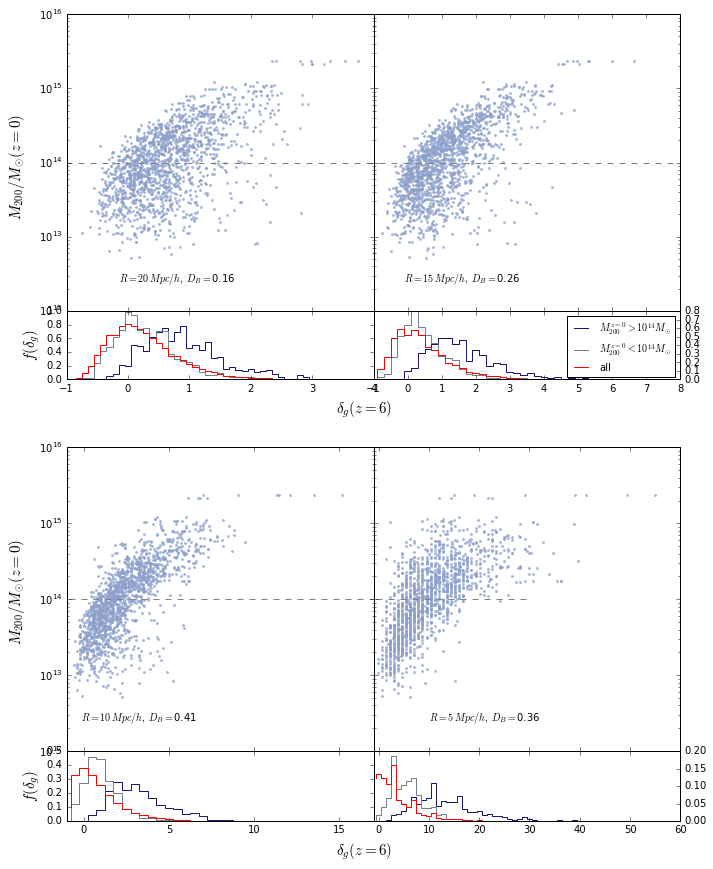

In [16]:
fig = plt.figure(figsize=(11,11.8))

gs1 = gridspec.GridSpec(16, 2)

gs1.update(bottom = 0.57, top = 1, hspace=0, wspace=0)

ax1 = fig.add_subplot(gs1[0:13,0])
ax2 = fig.add_subplot(gs1[0:13,1])

ax5 = fig.add_subplot(gs1[13:16,0])
ax6 = fig.add_subplot(gs1[13:16,1])


gs2 = gridspec.GridSpec(16, 2)

gs2.update(top=0.49, bottom=0.05, hspace=0, wspace=0)

ax3 = fig.add_subplot(gs2[0:13,0])
ax4 = fig.add_subplot(gs2[0:13,1])

ax7 = fig.add_subplot(gs2[13:16,0])
ax8 = fig.add_subplot(gs2[13:16,1])




## Subplot 1
binLimits = np.linspace(-1, 4, 51)
bins = np.linspace(-0.95, 3.95, 50)

phiA, mass = np.histogram(dat_z6top_go['delta_gal_20'][dat_z6top_go['z0_m_crit200'] >= 1e14],
                         bins=binLimits, normed=True)

ax5.step(bins, phiA, label='$M_{200}^{z=0} > 10^{14} M_{\odot}$', color='midnightblue')

phiB, mass = np.histogram(dat_z6top_go['delta_gal_20'][dat_z6top_go['z0_m_crit200'] < 1e14],
                         bins=binLimits, normed=True)

ax5.step(bins, phiB, label='$M_{200}^{z=0} < 10^{14} M_{\odot}$', color='slategrey')

phi, mass = np.histogram(dgal_r20['delta_gal_20'], bins=binLimits, normed=True)
ax5.step(bins, phi, label='all', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))

#ax5.legend(loc=2)
ax5.set_xlim(binLimits[0], binLimits[-1])
ax5.set_ylabel('$f(\delta_{g})$', size = 15)

## Plot 1
ax1.scatter('delta_gal_20', 'z0_m_crit200', data=dat_z6top_go, marker='o', s=8, alpha=0.8, c=set2[2], 
           lw=0, label='$z = 6$')#, c=np.log10(dat_z6top_go['z6_m_crit200']), cmap='viridis')

#ax1.scatter('delta_gal_10', 'z0_m_crit200', data=dat_z0top.ix[idx_z6main], marker='o', s=8, alpha=0.2, c=set2[1],
#          lw=0, label = '$z = 0$, main branch')
#ax1.scatter('delta_gal_10', 'z0_m_crit200', data=dat_z0top.ix[idx_z6largest], marker='o', s=8, alpha=0.2, c=set2[0],
#          lw=0, label = '$z = 0$, most massive')

ax1.set_yscale('log')

#ax1.set_ylim(2e12, 3e15)
ax1.set_xlim(binLimits[0], binLimits[-1])
ax1.set_xticklabels([])
#ax1.legend(loc=2, scatterpoints=1, numpoints=1, prop={'size': 10})
ax1.text(-0.14, 2.5e12, '$R = 20 \, Mpc / h, \; D_{B} = $' + str(round(DB, 2)))



## Subplot 2
binLimits = np.linspace(-1, 8, 46)
bins = np.linspace(-0.9, 7.9, 45)

phiA, mass = np.histogram(dat_z6top_go['delta_gal_15'][dat_z6top['z0_m_crit200'] >= 1e14],
                         bins=binLimits, normed=True)

ax6.step(bins, phiA, label='$M_{200}^{z=0} > 10^{14} M_{\odot}$', color='midnightblue')


phiB, mass = np.histogram(dat_z6top_go['delta_gal_15'][dat_z6top['z0_m_crit200'] < 1e14],
                         bins=binLimits, normed=True)

ax6.step(bins, phiB, label='$M_{200}^{z=0} < 10^{14} M_{\odot}$', color='slategrey')

phi, mass = np.histogram(dgal_r15['delta_gal_15'], bins=binLimits, normed=True)
ax6.step(bins, phi, label='all', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))

ax6.legend(loc=1, prop={'size': 10})
ax6.set_xlim(binLimits[0], binLimits[-1])
#ax6.set_ylim(0, 4.45)
ax6.yaxis.tick_right()


## Plot 2
ax2.scatter('delta_gal_15', 'z0_m_crit200', data=dat_z6top_go, marker='o', s=8, alpha=0.8, c=set2[2],
            lw=0, label='z6 selected')#, c=np.log10(dat_z6top_go['z6_m_crit200']), cmap='viridis')

# ax2.scatter('MField_g5', 'z0_m_crit200', data=dat_z0top.ix[idx_z6main], marker='o', s=8, alpha=0.2, c=set2[1],
#           lw=0, label = 'z0 selected, main progenitor')
# ax2.scatter('MField_g5', 'z0_m_crit200', data=dat_z0top.ix[idx_z6largest], marker='o', s=8, alpha=0.2, c=set2[0],
#           lw=0, label = 'z0 selected, largest progenitor')

ax2.set_yscale('log')

#ax2.set_ylim(2e12, 3e15)
ax2.set_xlim(binLimits[0], binLimits[-1])
ax2.text(-0.12, 2.5e12, '$R = 15 \, Mpc / h, \; D_{B} = $' + str(round(DB, 2)))
ax2.set_yticklabels([])
ax2.set_xticklabels([])


## Subplot 3
binLimits = np.linspace(-1, 17, 37)
bins = np.linspace(-0.75, 16.75, 36)

phiA, mass = np.histogram(dat_z6top_go['delta_gal_10'][dat_z6top['z0_m_crit200'] >= 1e14],
                         bins=binLimits, normed=True)

ax7.step(bins, phiA, label='$M_{200}^{z=0} > 10^{14} M_{\odot}$', color='midnightblue')


phiB, mass = np.histogram(dat_z6top_go['delta_gal_10'][dat_z6top['z0_m_crit200'] < 1e14],
                         bins=binLimits, normed=True)

ax7.step(bins, phiB, label='$M_{200}^{z=0} < 10^{14} M_{\odot}$', color='slategrey')

phi, mass = np.histogram(dgal_r10['delta_gal_10'],bins=binLimits, normed=True)
ax7.step(bins, phi, label='all', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))

ax7.set_xlim(binLimits[0], binLimits[-1])
#ax7.set_xlim(-0.2, 2.45)
ax7.set_ylabel('$f(\delta_{g})$', size = 15)


## Plot 3
ax3.scatter('delta_gal_10', 'z0_m_crit200', data=dat_z6top_go, marker='o', s=8, alpha=0.8, c=set2[2], 
            lw=0, label='z6 selected')#, c=np.log10(dat_z6top_go['z6_m_crit200']), cmap='viridis')

# ax3.scatter('MField_g2_5', 'z0_m_crit200', data=dat_z0top.ix[idx_z6main], marker='o', s=8, alpha=0.2, c=set2[1],
#           lw=0, label = 'z0 selected, main progenitor')
# ax3.scatter('MField_g2_5', 'z0_m_crit200', data=dat_z0top.ix[idx_z6largest], marker='o', s=8, alpha=0.2, c=set2[0],
#           lw=0, label = 'z0 selected, largest progenitor')

ax3.set_yscale('log')

#ax3.set_ylim(2e12, 3e15)
ax3.set_xlim(binLimits[0], binLimits[-1])
ax3.text(-0.13, 2.5e12, '$R = 10 \, Mpc / h, \; D_{B} = $' + str(round(DB, 2)))
ax3.set_xticklabels([])



## Subplot 4
binLimits = np.linspace(-1, 60, 62)
bins = np.linspace(-0.5, 59.5, 61)

phiA, mass = np.histogram(dat_z6top_go['delta_gal_5'][dat_z6top['z0_m_crit200'] >= 1e14],
                         bins=binLimits, normed=True)

ax8.step(bins, phiA, label='$M_{200}^{z=0} > 10^{14} M_{\odot}$', color='midnightblue')


phiB, mass = np.histogram(dat_z6top_go['delta_gal_5'][dat_z6top['z0_m_crit200'] < 1e14],
                         bins=binLimits, normed=True)

ax8.step(bins, phiB, label='$M_{200}^{z=0} < 10^{14} M_{\odot}$', color='slategrey')

phi, mass = np.histogram(dgal_r5['delta_gal_5'], bins=binLimits, normed=True)
ax8.step(bins, phi, label='all', color='red')

DB, BC = hightolowz.bhattacharyya(phiA*np.diff(binLimits), phiB*np.diff(binLimits))

ax8.yaxis.tick_right()
ax8.set_xlim(binLimits[0], binLimits[-1])
#ax8.set_ylim(0, 1)

## Plot 4
ax4.scatter('delta_gal_5', 'z0_m_crit200', data=dat_z6top_go, marker='o', s=8, alpha=0.8, c=set2[2], 
            lw=0, label='$z = 6$')#, c=np.log10(dat_z6top_go['z6_m_crit200']), cmap='viridis')

# ax4.scatter('MField_g1_25', 'z0_m_crit200', data=dat_z0top.ix[idx_z6main], marker='o', s=8, alpha=0.2, c=set2[1],
#           lw=0, label = '$z = 0$, main branch')
# ax4.scatter('MField_g1_25', 'z0_m_crit200', data=dat_z0top.ix[idx_z6largest], marker='o', s=8, alpha=0.2, c=set2[0],
#           lw=0, label = '$z = 0$, most massive')

ax4.set_yscale('log')

#ax4.set_ylim(2e12, 3e15)
ax4.set_xlim(binLimits[0], binLimits[-1])
ax4.text(10, 2.5e12, '$R = 5 \, Mpc / h, \; D_{B} = $' + str(round(DB, 2)))
ax4.set_yticklabels([])
ax4.set_xticklabels([])



for ax in [ax1,ax2,ax3,ax4]:
    ax.hlines(1e14, -10, 30, linestyle='--', color='grey')

fig.text(0.5, 0.53, '$\delta_{g} (z = 6)$', size=15, ha='center')  # common X 1
fig.text(0.5, 0.01, '$\delta_{g} (z = 6)$', size=15, ha='center')  # common X 2
fig.text(0.05, 0.82, '$M_{200} / M_{\odot} (z = 0)$', va='center', size = 15, rotation='vertical')  # common Y 1
fig.text(0.05, 0.32, '$M_{200} / M_{\odot} (z = 0)$', va='center', size = 15, rotation='vertical')  # common Y 2

#plt.savefig('../papers/hightolowz/images/gal_density_z0_m200.png', bbox_inches='tight', dpi=300)